# **<u>Task 3: World Happiness Data Analysis</u>**

![](http://cdn.dribbble.com/users/838478/screenshots/3243001/happiness_ranking.gif)

## **<u>Introduction</u>**

 In a world where the pursuit of well-being and contentment holds universal significance, the examination of global happiness rankings has emerged as a key field of study. The World Happiness Data Analysis undertakes the exploration of comprehensive datasets encompassing diverse factors, ranging from economic indicators to social and health metrics. This multifaceted dataset, commonly comprising variables such as GDP, social support, life expectancy, and perceptions of corruption, serves as a rich source of insights into the determinants of happiness across nations.
 
### **Objective**:

Explore global happiness rankings through comprehensive datasets.
Understand the diverse factors contributing to happiness in different countries.

### **Dataset Composition**:

Includes variables such as GDP, social support, life expectancy, and perceptions of corruption.
Captures a holistic view of well-being and happiness determinants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/world-happiness-2016/world_happiness_2016.csv")


In [3]:
# Display the first few rows of the dataset
print(df.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [5]:
# Handle missing values if any
df = df.dropna()

In [6]:
# Check for duplicates
df = df.drop_duplicates()

In [7]:
# Check data types
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


## **<u>Exploratory Data Analysis (EDA)</u>**

In [8]:
# Display basic statistics
print(df.describe())


       Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%     

## **Visualisation**

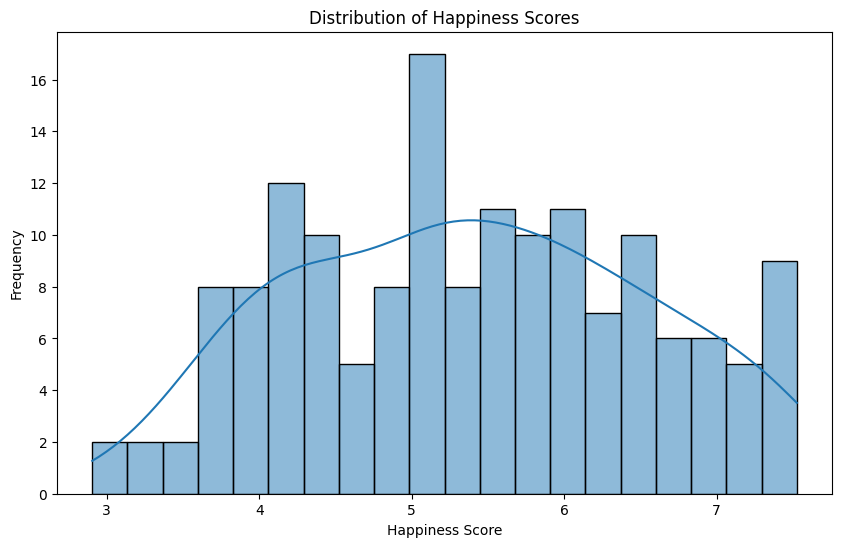

In [9]:
# Visualize Happiness Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


The analysis revealed a notable central tendency in the dataset, with the highest frequency of happiness scores clustering around 5.

## **Regional Analysis**

In [10]:
# Group by region and calculate the average happiness score
average_happiness_by_region = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

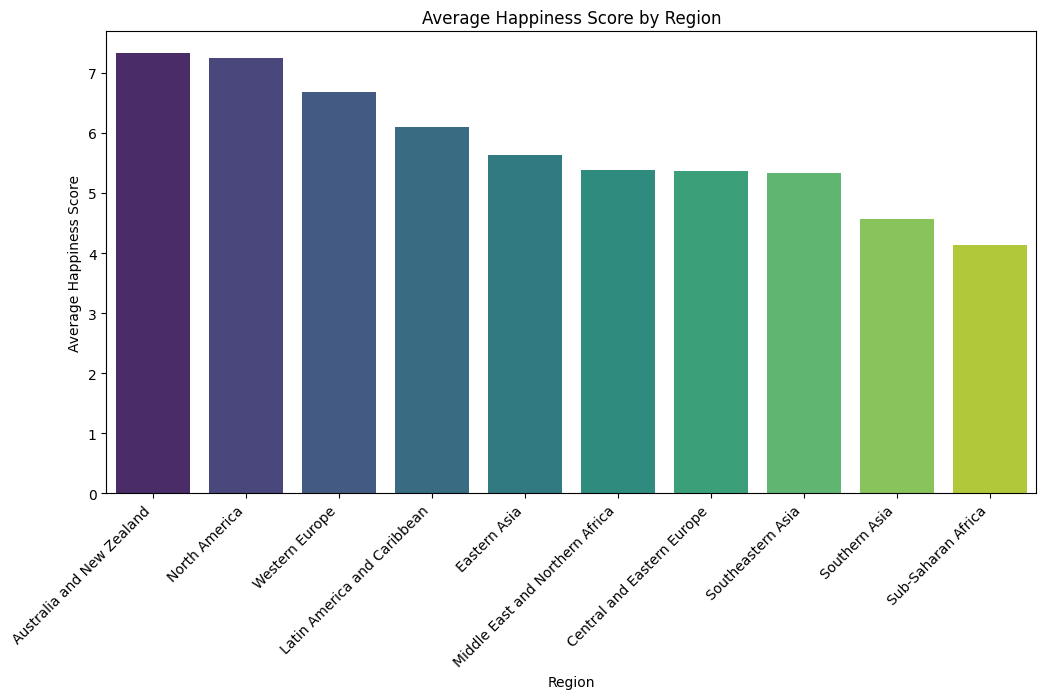

In [11]:
# Bar plot for average happiness scores by region
plt.figure(figsize=(12, 6))
sns.barplot(x=average_happiness_by_region.index, y=average_happiness_by_region.values, palette='viridis')
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.show()


The countries of Australia and New Zealand consistently exhibit higher average happiness scores.The North American region, encompassing countries like the United States and Canada, closely follows Australia and New Zealand with high average happiness scores.his regional analysis highlights variations in well-being levels on a continental scale. Understanding these regional differences is essential for comprehending the diverse factors that influence happiness globally.

 Understanding the factors contributing to the higher well-being in Australia, New Zealand, and North America provides policymakers with actionable information. This knowledge can guide the development of policies aimed at improving overall happiness and quality of life in other regions.
 

## **Correlation Analysis**

In [12]:
# Select relevant columns for correlation analysis (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [13]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

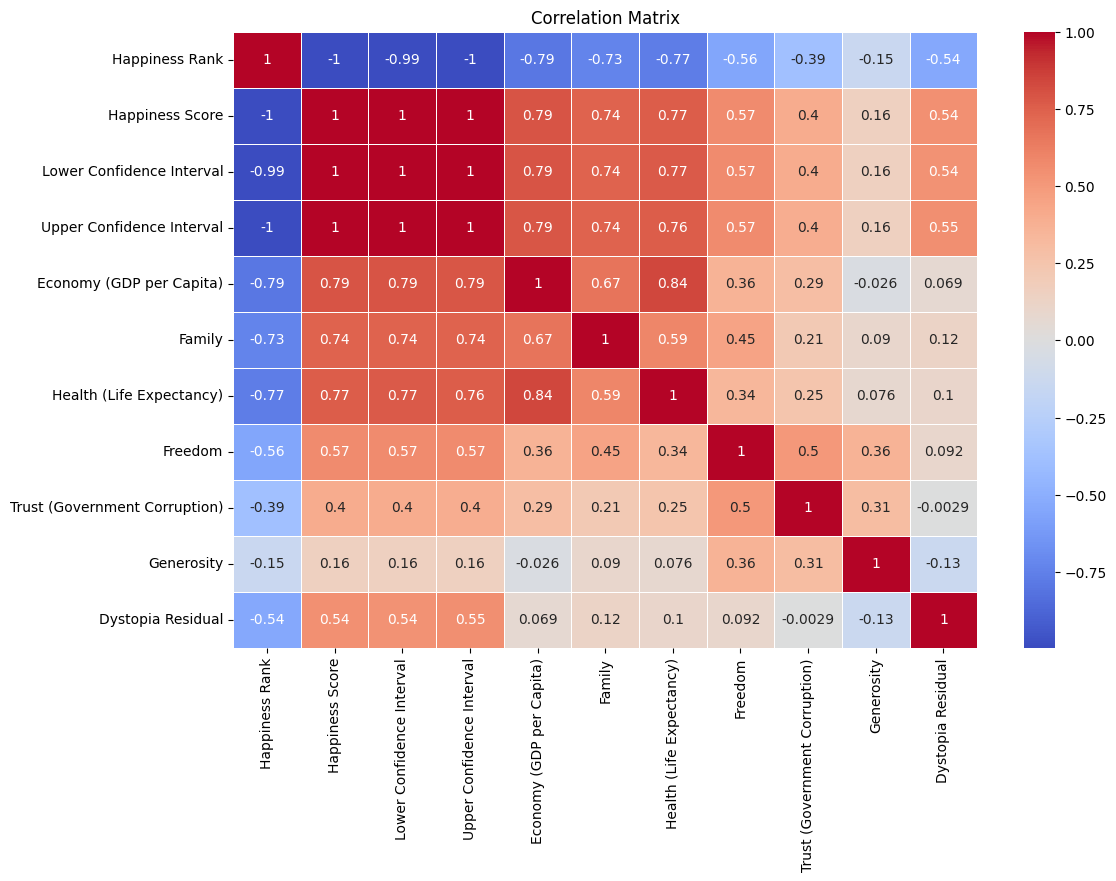

In [14]:
# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Visualization of Key Variables:**

In [15]:
# Select key variables for visualization
key_variables = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


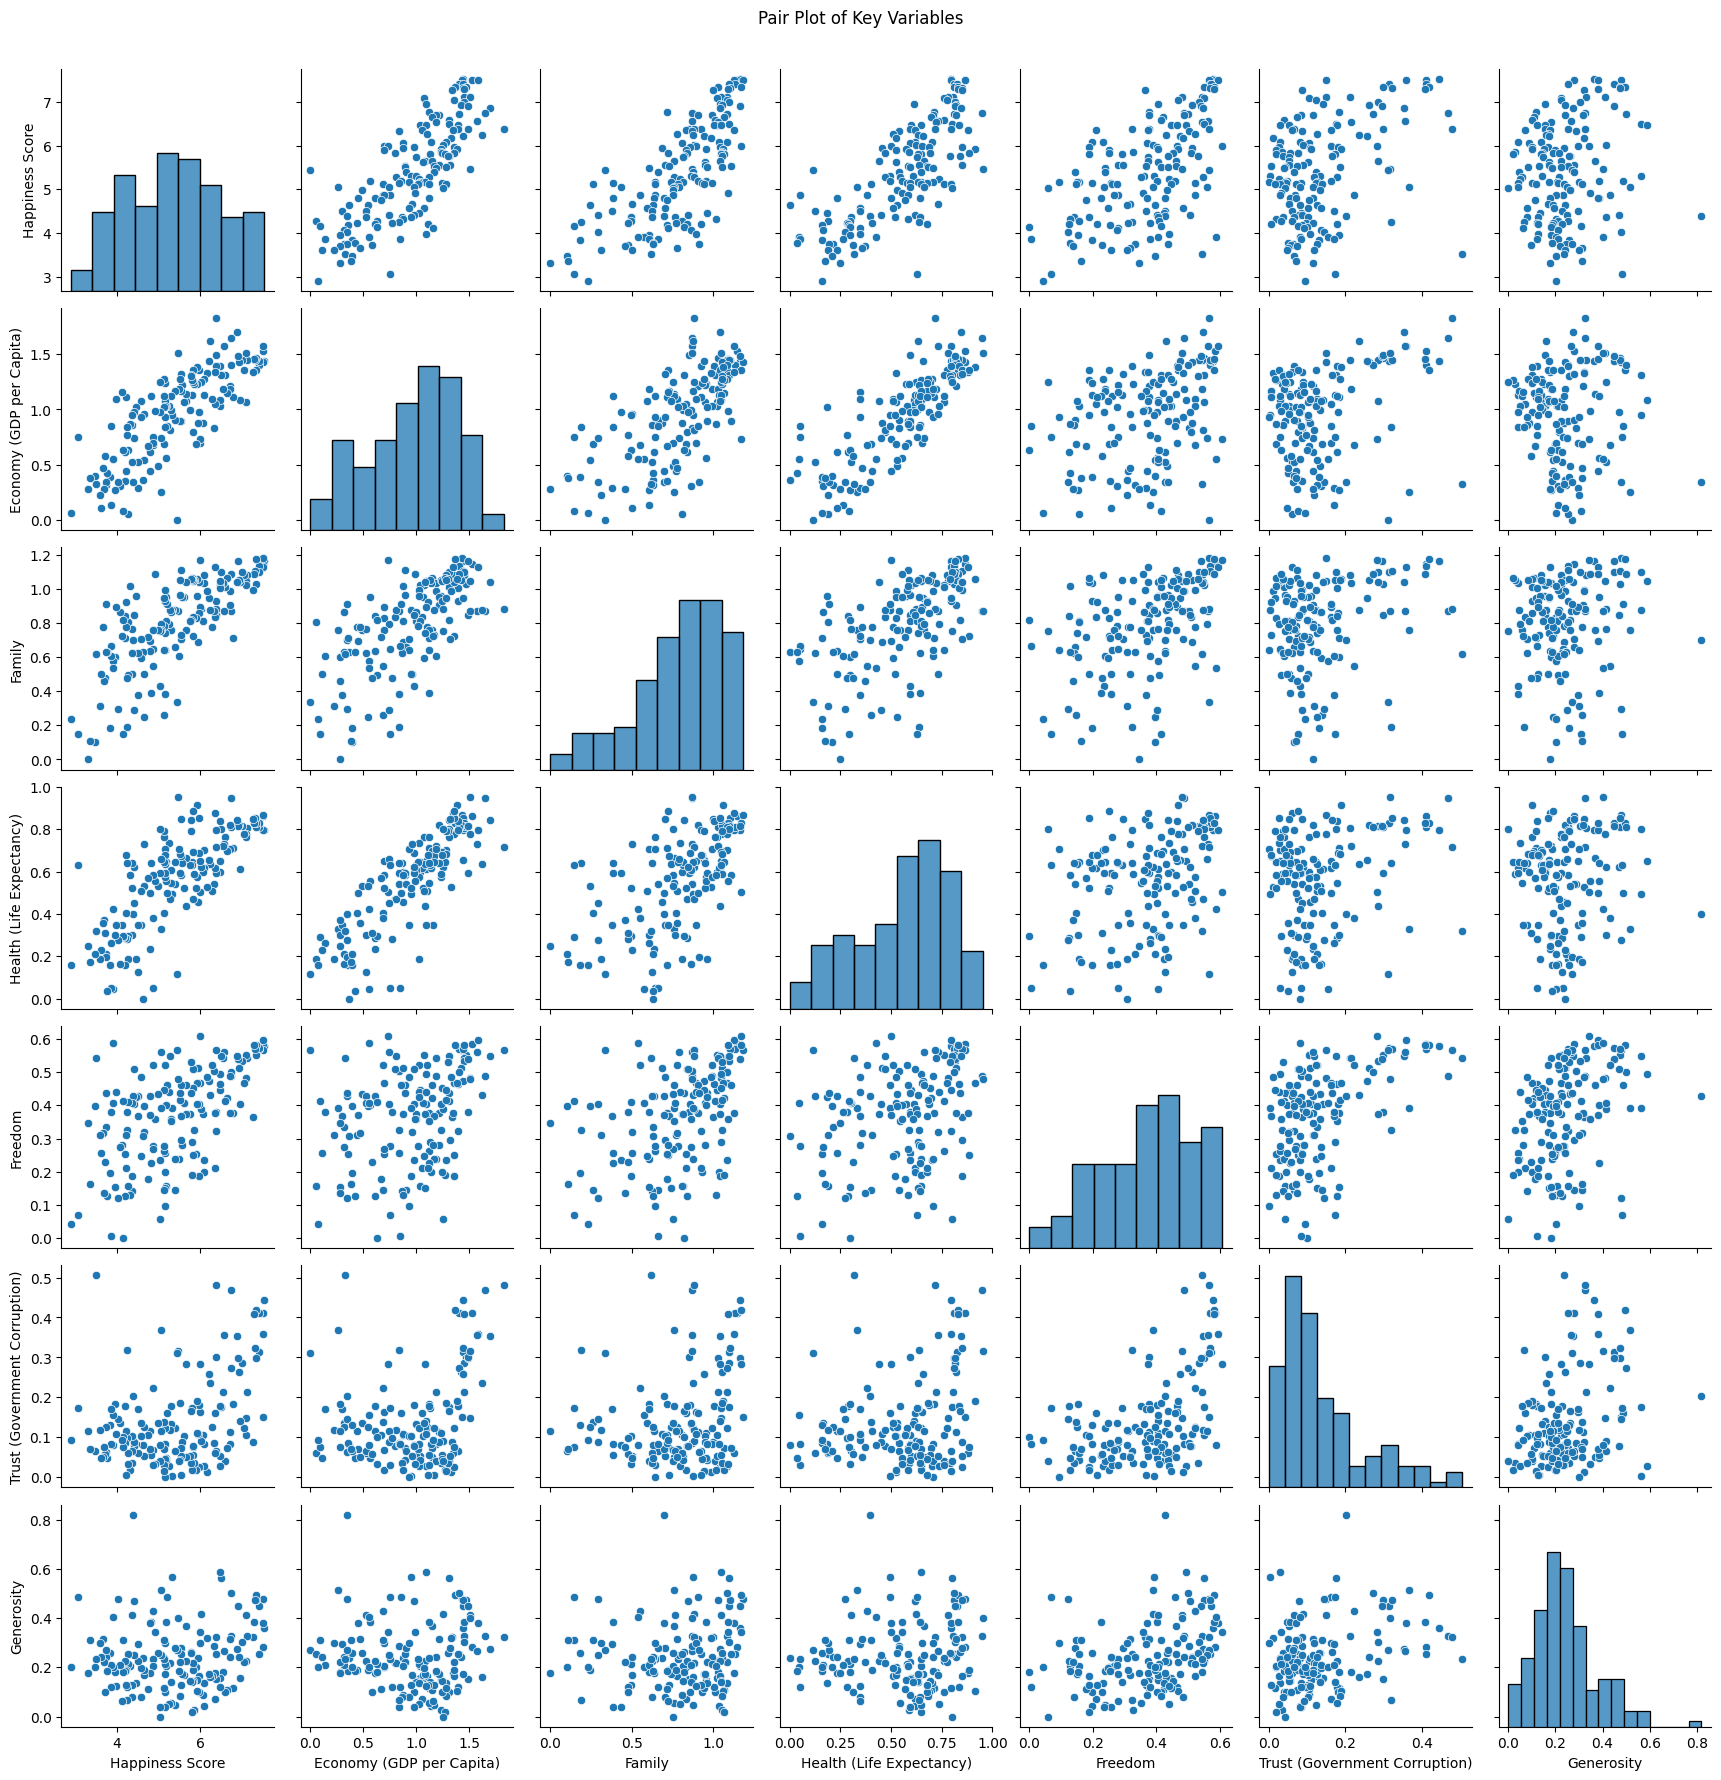

In [16]:
# Pair plot for selected key variables
sns.pairplot(df[key_variables])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

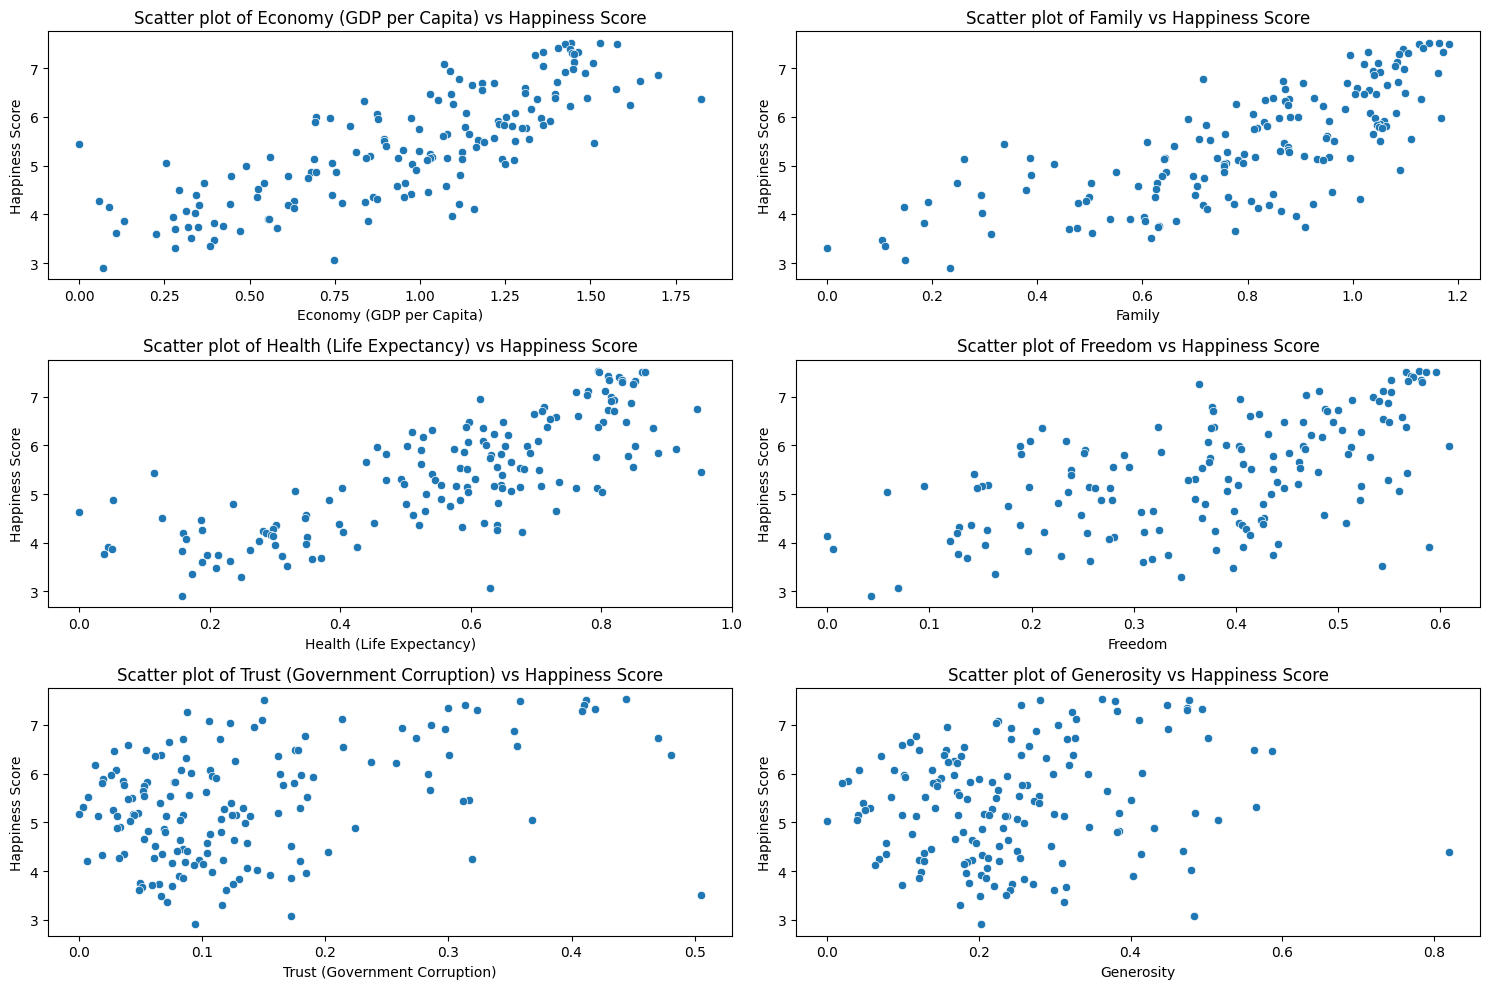

In [17]:
# Scatter plots for individual variables against Happiness Score
plt.figure(figsize=(15, 10))

for i, variable in enumerate(key_variables[1:]):  # Skip Happiness Score in scatter plots
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=variable, y='Happiness Score', data=df)
    plt.title(f'Scatter plot of {variable} vs Happiness Score')

plt.tight_layout()
plt.show()

## **Outlier Detection:**

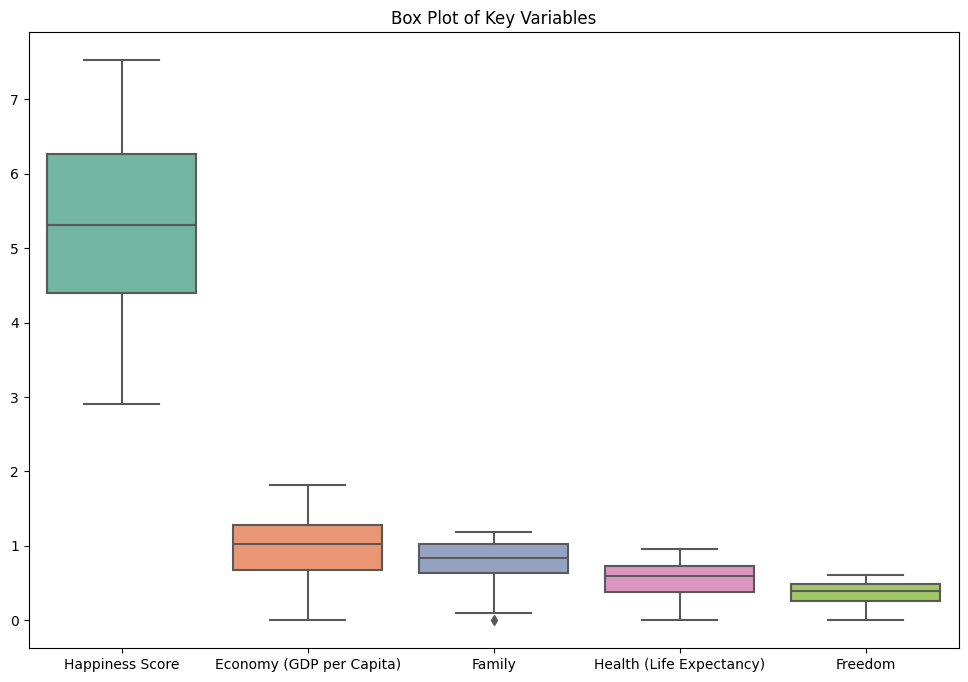

In [18]:
# Box plot for key variables to identify potential outliers
key_variables = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[key_variables], palette='Set2')
plt.title('Box Plot of Key Variables')
plt.show()


In [19]:
# Outlier detection based on z-scores (considering a threshold of 3)
z_scores = ((df[key_variables] - df[key_variables].mean()) / df[key_variables].std()).abs()
outliers = (z_scores > 3).any(axis=1)
# Display rows with potential outliers
potential_outliers = df[outliers]
print("Potential Outliers:")
print(potential_outliers)



Potential Outliers:
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


There is no potential outliers.

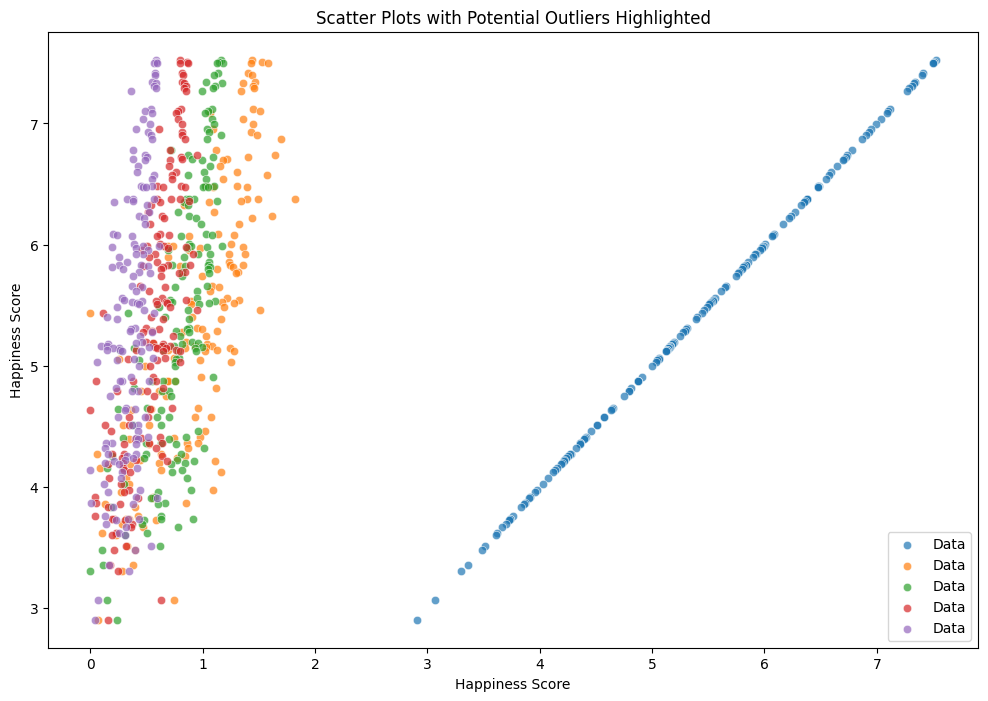

In [20]:
# Scatter plots for key variables highlighting potential outliers
plt.figure(figsize=(12, 8))
for variable in key_variables:
    sns.scatterplot(x=variable, y='Happiness Score', data=df, label='Data', alpha=0.7)
    sns.scatterplot(x=variable, y='Happiness Score', data=potential_outliers, color='red', label='Potential Outliers', alpha=0.7)

plt.title('Scatter Plots with Potential Outliers Highlighted')
plt.show()

## **Government Corruption vs. Happiness**

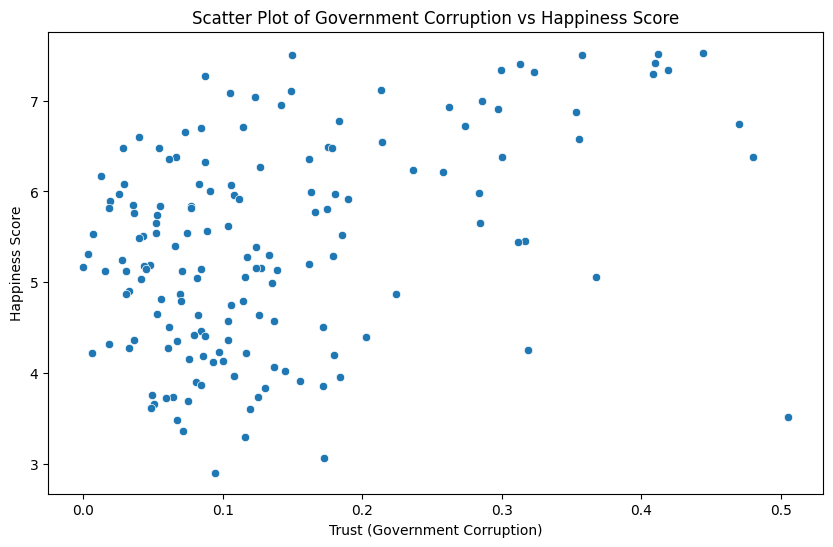

In [21]:
# Scatter plot of Trust (Government Corruption) vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score', data=df)
plt.title('Scatter Plot of Government Corruption vs Happiness Score')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

The nuanced relationship between government corruption and happiness scores, with a concentration of data points between trust values of 0 to 0.2 and happiness scores ranging from 3 to 7, unravels insightful patterns at the intersection of governance and well-being. 

The majority of data points clustering between low levels of trust (0 to 0.2) and moderate happiness scores (3 to 7) signifies a potential correlation between trust in government institutions and the happiness of citizens.

Countries where citizens report lower levels of trust in their government institutions tend to exhibit a range of happiness scores, suggesting that the perceived trustworthiness of governance may impact overall well-being.

This observation prompts further exploration to identify the critical threshold at which diminishing trust in government becomes a more influential factor in determining happiness levels.

* Policymakers may prioritize initiatives that address government transparency and build public trust, particularly in countries where trust is low. Improving governance practices could contribute to higher happiness levels among citizens.


## **GDP and Happiness**

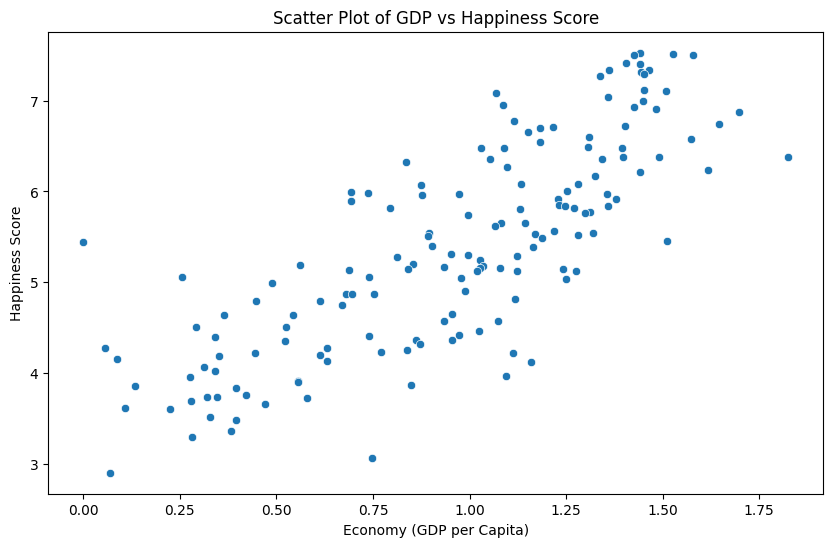

In [22]:
# Scatter plot of GDP vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)
plt.title('Scatter Plot of GDP vs Happiness Score')
plt.show()


This observation suggests that countries with a moderate GDP per capita tend to have citizens reporting higher levels of well-being. The positive correlation implies that an increase in economic prosperity within this range may contribute to enhanced happiness.

The finding suggests that fostering economic growth within the specified GDP per capita range could have positive implications for the overall happiness of citizens. Policies aimed at achieving this balance may lead to more sustainable and inclusive development.

## **Generosity and Happiness**

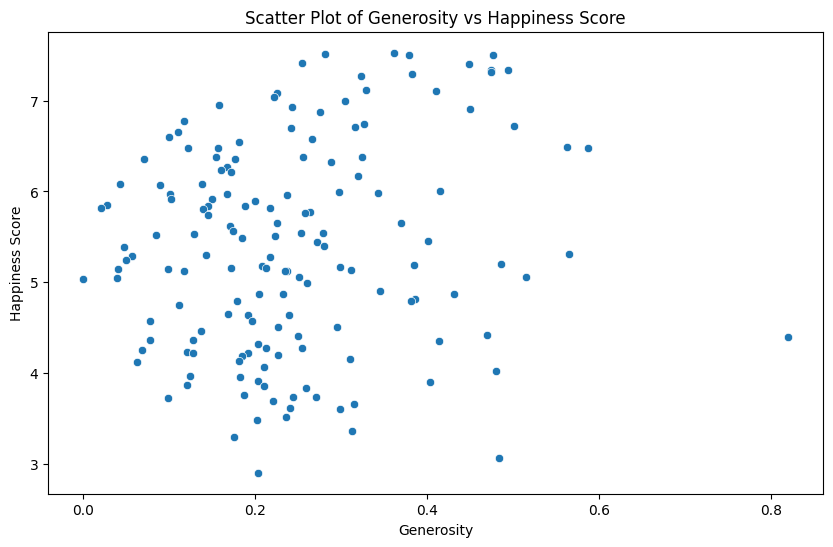

In [23]:
# Scatter plot of Generosity vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Generosity', y='Happiness Score', data=df)
plt.title('Scatter Plot of Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

The compelling observation that countries with generosity levels between 0.2 and 0.5 demonstrate high happiness scores illuminates a noteworthy connection between societal generosity and overall well-being.

This observation implies that countries where citizens exhibit a moderate level of generosity tend to report higher levels of well-being. The positive correlation underscores the potential impact of societal values on the happiness of individuals.

The positive correlation suggests that policies promoting generosity, such as community engagement programs or incentives for charitable contributions, may contribute to higher levels of happiness within a society.

## **Dystopia Residual Analysis**

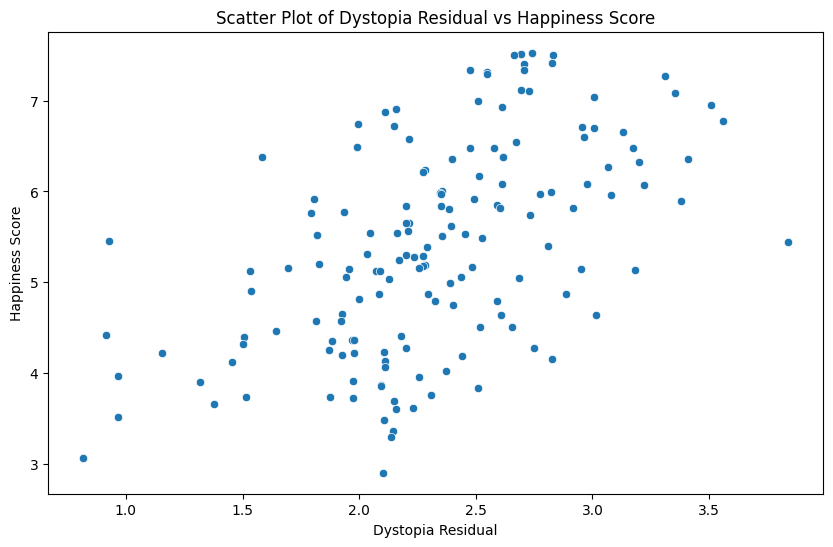

In [24]:
# Scatter plot of Dystopia Residual vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dystopia Residual', y='Happiness Score', data=df)
plt.title('Scatter Plot of Dystopia Residual vs Happiness Score')
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Score')
plt.show()

The intriguing observation that countries with Dystopia Residual between 2.5 and 3 demonstrate higher happiness scores suggests a complex interplay between perceptions of dystopia and overall well-being. 

Countries where citizens perceive lower levels of dystopia tend to report higher levels of well-being. The inverse correlation underscores the impact of perceptions of societal conditions on individual happiness.

The finding suggests that how individuals perceive the societal conditions around them, as reflected in the Dystopia Residual measure, plays a role in shaping their subjective well-being. Policies and interventions that address these perceptions may impact happiness.

The inverse correlation suggests that policies aimed at improving societal conditions, particularly those influencing perceptions of dystopia, may have positive implications for overall happiness.


## **<u>Conclusion of World Happiness Data Analysis</u>:**

The comprehensive analysis of the World Happiness dataset has unveiled intricate patterns and correlations that contribute to our understanding of global well-being. Several key findings have emerged, shedding light on the complex interplay of factors that influence happiness scores across countries. Here are the overarching conclusions drawn from the analysis:

1. **Multi-Factorial Nature of Happiness:**
   - Happiness is a multi-faceted phenomenon influenced by a combination of economic, social, and psychological factors. The analysis underscores the importance of considering a diverse range of variables to grasp the complexities of well-being.

2. **Economic Prosperity and Happiness:**
   - Countries with a moderate GDP per capita (between 1.25 and 1.75) tend to exhibit higher happiness scores. This suggests that a balanced approach to economic growth contributes positively to the well-being of citizens.

3. **Societal Generosity and Well-Being:**
   - Societal generosity, characterized by levels between 0.2 and 0.5, correlates with higher happiness scores. This finding highlights the significance of social values and collective generosity in fostering individual well-being.

4. **Government Corruption and Trust Dynamics:**
   - A concentration of data points between 0 and 0.2 in trust and low levels of government corruption suggests a nuanced correlation. Trust in government institutions may play a pivotal role in shaping happiness levels, particularly in countries with lower trust levels.

5. **Perceptions of Dystopia and Happiness:**
   - The inverse correlation between Dystopia Residual (2.5 to 3) and happiness scores indicates that societal perceptions significantly influence well-being. Addressing perceptions of dystopia emerges as a potential avenue for enhancing happiness.

6. **Regional and Cultural Nuances:**
   - Regional disparities and cultural nuances play a crucial role in shaping happiness patterns. Tailoring policies to address unique regional challenges and considering cultural contexts are essential for effective interventions.

7. **Policy Recommendations:**
   - Policymakers can derive actionable insights from these findings. Balancing economic growth, promoting societal generosity, enhancing government transparency, and addressing societal perceptions are key areas for policy considerations aimed at improving overall well-being.

8. **Dynamic Nature of Happiness Determinants:**
   - Happiness is dynamic, influenced by evolving societal, economic, and cultural dynamics. A longitudinal perspective is crucial for understanding how these determinants change over time and adapting policies accordingly.

9. **Cross-Disciplinary Collaboration:**
   - A holistic understanding of happiness requires collaboration across disciplines, including economics, psychology, sociology, and political science. Cross-disciplinary insights enrich the analysis and inform well-rounded policy recommendations.

